# **KERNEL RIDGE REGRESSION**

# **INTRODUCTION**

* Kernel ridge regression (KRR) combines ridge regression (linear least squares with l2-norm regularization) with the kernel trick. 

* It thus learns a linear function in the space induced by the respective kernel and the data. 

* For non-linear kernels, this corresponds to a non-linear function in the original space.

* The form of the model learned by KRR is identical to support vector regression (SVR). However, different loss functions are used: KRR uses squared error loss while support vector regression uses epsilon-insensitive loss, both combined with l2 regularization.

*  In contrast to SVR, fitting a KRR model can be done in closed-form and is typically faster for medium-sized datasets. On the other hand, the learned model is non-sparse and thus slower than SVR, which learns a sparse model for epsilon > 0, at prediction-time.

## **COMPARISON BETWEEN KRR AND SVR**

* The following figure compares KernelRidge and SVR on an artificial dataset, which consists of a sinusoidal target function and strong noise added to every fifth datapoint.

* The learned model of KernelRidge and SVR is plotted, where both complexity/regularization and bandwidth of the RBF kernel have been optimized using grid-search.

*  The learned functions are very similar; however, fitting KernelRidge is approximately seven times faster than fitting SVR (both with grid-search). 
   
*  However, prediction of 100000 target values is more than three times faster with SVR since it has learned a sparse model using only approximately 1/3 of the 100 training datapoints as support vectors.




![Picture](https://scikit-learn.org/stable/_images/sphx_glr_plot_kernel_ridge_regression_001.png)

* The next figure compares the time for fitting and prediction of KernelRidge and SVR for different sizes of the training set. 
 
* Fitting KernelRidge is faster than SVR for medium-sized training sets (less than 1000 samples); however, for larger training sets SVR scales better.
 
* With regard to prediction time, SVR is faster than KernelRidge for all sizes of the training set because of the learned sparse solution. 
  
* Note that the degree of sparsity and thus the prediction time depends on the parameters  and  of the SVR;  would correspond to a dense model.

![Picture](https://scikit-learn.org/stable/_images/sphx_glr_plot_kernel_ridge_regression_003.png)


# **IMPLEMENTATION OF KERNEL RIDGE REGRESSION USING PYTHON**

## **PARAMETERS**

## **1. alphafloat or array-like of shape (n_targets,), default=1.**

Regularization strength; must be a positive float. Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization. Alpha corresponds to 1 / (2C) in other linear models such as LogisticRegression or LinearSVC. If an array is passed, penalties are assumed to be specific to the targets. Hence they must correspond in number. See Ridge regression and classification for formula.

## **2.kernelstr or callable, default=”linear”**

Kernel mapping used internally. This parameter is directly passed to pairwise_kernel. If kernel is a string, it must be one of the metrics in pairwise.PAIRWISE_KERNEL_FUNCTIONS. If kernel is “precomputed”, X is assumed to be a kernel matrix. Alternatively, if kernel is a callable function, it is called on each pair of instances (rows) and the resulting value recorded. The callable should take two rows from X as input and return the corresponding kernel value as a single number. This means that callables from sklearn.metrics.pairwise are not allowed, as they operate on matrices, not single samples. Use the string identifying the kernel instead.

## **3.gammafloat, default=None**

Gamma parameter for the RBF, laplacian, polynomial, exponential chi2 and sigmoid kernels. Interpretation of the default value is left to the kernel; see the documentation for sklearn.metrics.pairwise. Ignored by other kernels.

## **4.degreefloat, default=3**

Degree of the polynomial kernel. Ignored by other kernels.

## **5.coef0float, default=1**

Zero coefficient for polynomial and sigmoid kernels. Ignored by other kernels.

## **6.kernel_paramsmapping of str to any, default=None**

Additional parameters (keyword arguments) for kernel function passed as callable object.

# **ATTRIBUTES**

## **1.dual_coef_ndarray of shape (n_samples,) or (n_samples, n_targets)**

Representation of weight vector(s) in kernel space

## **2.X_fit_{ndarray, sparse matrix} of shape (n_samples, n_features)**
Training data, which is also required for prediction. If kernel == “precomputed” this is instead the precomputed training matrix, of shape (n_samples, n_samples).

## **3.n_features_in_int**

Number of features seen during fit.



## **4.feature_names_in_ndarray of shape (n_features_in_,)**

Names of features seen during fit. Defined only when X has feature names that are all strings.

# **CODE:**

In [ ]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.kernel_ridge import KernelRidge


In [ ]:
list_x = []
list_y = []
list_x_pred = []
list_y_real = []
random.seed(2020)

In [ ]:
for i in range(-10,11):
    x = i/2
    rnd_number= random.uniform(-1,1)
    y = (x+4)*(x+1)*(x-1)*(x-3) + rnd_number
    list_x.append(x)
    list_y.append(y)
    print(x,y)


-5.0 192.23933854132133
-4.5 71.53654773042194
-4.0 0.536954678014127
-3.5 -35.6711130821335
-3.0 -48.051678115596815
-2.5 -42.445219689319835
-2.0 -29.914028880619604
-1.5 -13.827574460332539
-1.0 -0.08435514871871752
-0.5 8.667618556583285
0.0 11.41917008772094
0.5 8.777965638120474
1.0 0.20904761774690672
1.5 -10.369521328026805
2.0 -18.790035192584018
2.5 -16.722295877908074
3.0 -0.017725990211916898
3.5 42.933561066115054
4.0 120.07490303735703
4.5 245.3885664612223
5.0 431.08170661989993


In [ ]:
for i in range(-50,51):
    x = 0.1*i
    list_x_pred.append(x)
    list_y_real.append((x+4)*(x+1)*(x-1)*(x-3))

In [ ]:
list_x = np.array(list_x).reshape(-1, 1)
list_x_pred = np.array(list_x_pred).reshape(-1, 1)
# Do linear regression using database with 21 points
list_y_pred = []
short_list_y_pred = []
rmse_list = []

In [ ]:
for degree_value in [2,3,4,5]:
    krr = KernelRidge(alpha=1.0,kernel='polynomial',degree=degree_value)
    krr.fit(list_x,list_y)
    list_y_pred.append(krr.predict(list_x_pred))
    new_y = krr.predict(list_x)
    short_list_y_pred.append(new_y)
    # Print rmse value
    rmse = math.sqrt(mean_squared_error(new_y, list_y))
    rmse_list.append(rmse)
    print('############################')
    print('Degree:', degree_value)
    print('Root Mean Squared Error: %.1f' % rmse)

############################
Degree: 2
Root Mean Squared Error: 59.8
############################
Degree: 3
Root Mean Squared Error: 55.8
############################
Degree: 4
Root Mean Squared Error: 1.0
############################
Degree: 5
Root Mean Squared Error: 1.0


Text(0.15, 0.85, '$RMSE$ = 1.0')

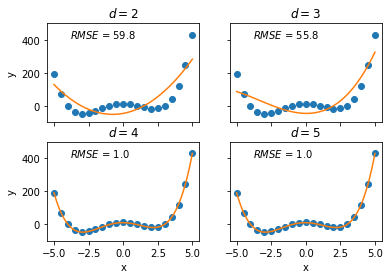

In [ ]:
fig, axs = plt.subplots(2, 2)
for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
# Subplot top-left
axs[0, 0].scatter(list_x, list_y,color='C0')
axs[0, 0].plot(list_x_pred,list_y_pred[0],color='C1')
axs[0, 0].set_title(r'$d = 2$')
axs[0, 0].set_xlim(-5.5,5.5)
axs[0, 0].set_ylim(-100,500)
axs[0, 0].annotate(u'$RMSE$ = %.1f' % rmse_list[0], xy=(0.15,0.85), xycoords='axes fraction')
# Subplot top-right
axs[0, 1].scatter(list_x, list_y,color='C0')
axs[0, 1].plot(list_x_pred,list_y_pred[1], color='C1')
axs[0, 1].set_title(r'$d = 3$')
axs[0, 1].set_xlim(-5.5,5.5)
axs[0, 1].set_ylim(-100,500)
axs[0, 1].annotate(u'$RMSE$ = %.1f' % rmse_list[1], xy=(0.15,0.85), xycoords='axes fraction')
# Subplot bottom-left
axs[1, 0].scatter(list_x, list_y,color='C0')
axs[1, 0].plot(list_x_pred,list_y_pred[2], color='C1')
axs[1, 0].set_title(r'$d = 4$')
axs[1, 0].set_xlim(-5.5,5.5)
axs[1, 0].set_ylim(-100,500)
axs[1, 0].annotate(u'$RMSE$ = %.1f' % rmse_list[2], xy=(0.15,0.85), xycoords='axes fraction')
# Subplot bottom-right
axs[1, 1].scatter(list_x, list_y,color='C0')
axs[1, 1].plot(list_x_pred,list_y_pred[3], color='C1')
axs[1, 1].set_title(r'$d = 5$')
axs[1, 1].set_xlim(-5.5,5.5)
axs[1, 1].set_ylim(-100,500)
axs[1, 1].annotate(u'$RMSE$ = %.1f' % rmse_list[3], xy=(0.15,0.85), xycoords='axes fraction')



# **ADVANTAGES OF KRR**

* Works on any size of the dataset.

* It works really well with a clear margin of separation.

* Works very well on non-linear problems.


# **DISADVANTAGES OF KRR**

* We need to choose the right polynomial degree for good variance tradeoff.

* It doesn’t directly provide probability estimates.



# **APPLICATIONS OF KRR**

a) Slope System Reliability Analysis.

b) Prediction of Bearing Capacity of Cement-Flyash-Gravel Pile Composite Foundation.

c) Spectroscopy for carbon and nitrogen prediction in soils under sugarcane.

d) Streamflow Forecast.

e) Determine Stability State of Asphaltene in Oilfields by Utilizing SARA Fractions.





## **CONCLUSION**

Here,we have given a brief idea on Kernel Ridge Regression, their pros and cons, applications and implementation with the help of Python.
